### Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sci

from matplotlib.patches import Ellipse
from sklearn.linear_model import LinearRegression

In [2]:
np.random.seed(111)

### Ex 1)

Set the normal distribution in $R^2$ with parameters $(\mu_1, \mu_2, \sigma_1, \sigma_2, \rho)$ (choose independently, but so that there is a correlation). Generate $100$ random vectors with this distribution. Find a confidence ellipsoid of level $0.95$ (that is, at least $95%$ of the values will fall into the ellipsoid). That is: find the equation of the main axes and the distance of the center to the vertices (that is, to the extreme points). Also draw regression lines of one coordinate on another. How will the shape of the ellipse change when the parameters are changed $\sigma_1, \sigma_2, \rho$? Give several examples.

In [3]:
N = 100

mu_1 = 10
mu_2 = 15

sigma_1 = 3
sigma_2 = 4
pho = 0.5

In [4]:
mu = np.array((mu_1, mu_2))
sigma = np.array([[sigma_1**2, pho * sigma_1 * sigma_2],
                [pho * sigma_1 * sigma_2, sigma_2**2]])

In [5]:
x, y = np.random.multivariate_normal(mu, sigma, N).T

In [6]:
cov = np.cov(x, y)

In [7]:
def eigsorted(cov):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:,order]

In [8]:
vals, vecs = eigsorted(cov)
theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

In [9]:
confidance = 0.95
nstd = - sci.stats.norm.ppf((1 - confidance)/2)

In [10]:
w, h = 2 * nstd * np.sqrt(vals)

In [11]:
regr_xy = LinearRegression()
regr_xy.fit(x.reshape(-1, 1), y.reshape(-1, 1))
y_pred = regr_xy.predict(x.reshape(-1, 1))

regr_yx = LinearRegression()
regr_yx.fit(y.reshape(-1, 1), x.reshape(-1, 1))
x_pred = regr_yx.predict(y.reshape(-1, 1))

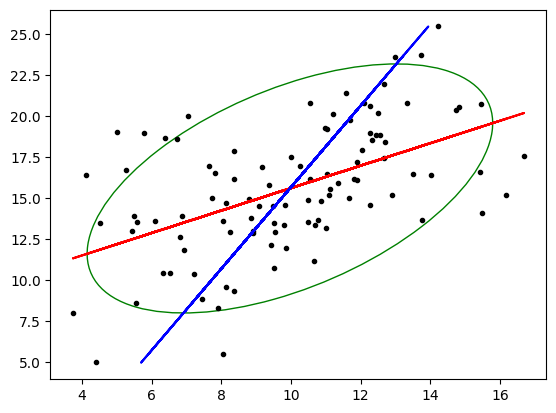

In [12]:
fig, ax = plt.subplots()

ell = Ellipse(xy=(np.mean(x), np.mean(y)),
              width=w, height=h,
              angle=theta, color='green')

ell.set_facecolor('none')

ax.add_artist(ell)

ax.scatter(x, y, marker=".", color="black")

ax.plot(x, y_pred, color ='red')
ax.plot(x_pred, y, color ='blue')

plt.show()

### Ex 2) (Rencher 5.18 a, b)

Twenty engineer apprentices and 20 pilots were given six tests (Travers 1939). The variables were

1) $y_1$ = intelligence,
2) $y_2$ = form relations,
3) $y_3$ = dynamometer,
4) $y_4$ = dotting,
5) $y_5$ = sensory motor coordination,
6) $y_6$ = perseveration.

The data are given in Table 5.6.

(a) Test $H_0$ : $\mu_1 = \mu_2$.

(b) If the $T^2$-test in part (a) rejects $H_0$, carry out a t-test for each variable.

In [13]:
cols = ["type"] + [f"y{i+1}" for i in range(6)]
df = pd.read_table("data/T5_6_PILOT.DAT", header=None, sep="\s+", names=cols)
df

,type,y1,y2,y3,y4,y5,y6
0,1,121,22,74,223,54,254
1,1,108,30,80,175,40,300
2,1,122,49,87,266,41,223
3,1,77,37,66,178,80,209
4,1,140,35,71,175,38,261
5,1,108,37,57,241,59,245
6,1,124,39,52,194,72,242
7,1,130,34,89,200,85,242
8,1,149,55,91,198,50,277
9,1,129,38,72,162,47,268


In [14]:
df_1 = df[df["type"] == 1].drop(columns="type")
df_2 = df[df["type"] == 2].drop(columns="type")

In [15]:
n_1, n_2 = df_1.shape[0], df_2.shape[0]

In [16]:
mu_1, mu_2 = df_1.mean(), df_2.mean()
S_1, S_2 = df_1.cov(), df_2.cov()

In [17]:
S_pl = (S_1 * (n_1 - 1) + S_2 * (n_2 - 1)) / (n_1 + n_2 - 2)

In [18]:
T_squared = (n_1 * n_2) / (n_1 + n_2) * (mu_1 - mu_2).T @ np.linalg.inv(S_pl) @ (mu_1 - mu_2)
T_squared

66.66043899022216

Hotelling’s $T^2$ distribution is not properly realized in Puthon (apparantly), so we will use the

$$\frac{n_1 + n_2 - p - 1}{(n_1 + n_2 - 2)p} T^2 = F_{p, n_1+n_2-p-1}$$

In [19]:
p = df_1.shape[1]

In [20]:
F = T_squared * (n_1 + n_2 - p - 1)/((n_1 + n_2 - 2)*p)
F

9.648221432795314

In [21]:
F_a = sci.stats.f.ppf(0.95, p, n_1 + n_2 - p - 1)
F_a

2.389393897988133

In [22]:
print(f"H0 is {F < F_a}")

H0 is False


For each individual $y_i$:

In [23]:
for col in df_1.columns:
    res = sci.stats.ttest_ind(df_1[col], df_2[col], equal_var=True)
    print(f"{col}\t t{col[1]} = {res.statistic:.4f}\t pval{col[1]} = {res.pvalue:.4f}\t H0 is {res.pvalue > 0.05}")

y1	 t1 = -0.6556	 pval1 = 0.5160	 H0 is True
y2	 t2 = 2.6139	 pval2 = 0.0128	 H0 is False
y3	 t3 = -3.2884	 pval3 = 0.0022	 H0 is False
y4	 t4 = -4.6315	 pval4 = 0.0000	 H0 is False
y5	 t5 = 1.8873	 pval5 = 0.0668	 H0 is True
y6	 t6 = -3.2205	 pval6 = 0.0026	 H0 is False


### Ex 3) (Rencher 5.20 a)

Various aspects of economic cycles were measured for consumers’ goods and
producers’ goods by Tintner (1946). The variables are

1) $y_1$ = length of cycle,
2) $y_2$ = percentage of rising prices,
3) $y_3$ = cyclical amplitude,
4) $y_4$ = rate of change.

The data for several items are given in Table 5.8.

(a) Test $H_0$ : $\mu_1 = \mu_2$.

In [24]:
cols = ["type"] + [f"y{i+1}" for i in range(4)]
df = pd.read_table("data/T5_8_GOODS.DAT", header=None, sep="\s+", names=cols)
df

,type,y1,y2,y3,y4
1,1,72.0,50,8.0,0.5
2,1,66.5,48,15.0,1.0
3,1,54.0,57,14.0,1.0
4,1,67.0,60,15.0,0.9
5,1,44.0,57,14.0,0.3
6,1,41.0,52,18.0,1.9
7,1,34.5,50,4.0,0.5
8,1,34.5,46,8.5,1.0
9,1,24.0,54,3.0,1.2
1,2,57.0,57,12.5,0.9


In [25]:
df_1 = df[df["type"] == 1].drop(columns="type")
df_2 = df[df["type"] == 2].drop(columns="type")

In [26]:
n_1, n_2 = df_1.shape[0], df_2.shape[0]

In [27]:
mu_1, mu_2 = df_1.mean(), df_2.mean()
S_1, S_2 = df_1.cov(), df_2.cov()

In [28]:
S_pl = (S_1 * (n_1 - 1) + S_2 * (n_2 - 1)) / (n_1 + n_2 - 2)

In [29]:
T_squared = (n_1 * n_2) / (n_1 + n_2) * (mu_1 - mu_2).T @ np.linalg.inv(S_pl) @ (mu_1 - mu_2)
T_squared

18.462480293007847

In [30]:
p = df_1.shape[1]

In [31]:
F = T_squared * (n_1 + n_2 - p - 1)/((n_1 + n_2 - 2)*p)
F

3.8010988838545567

In [32]:
F_a = sci.stats.f.ppf(0.95, p, n_1 + n_2 - p - 1)
F_a

3.112249847961388

In [33]:
print(f"H0 is {F < F_a}")

H0 is False
